In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading File
job = pd.read_csv(r"C:\Users\Admin\Downloads\Job_Placement_Data.csv")
job.head(10)

# STATUS is our target variable and its a CLASSIFICATION problem where we've to predict whether the candidate gets PLACED or NOT 

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [3]:
# Checking Shape
job.shape

(215, 15)

In [4]:
# Checking if any Null Values
job.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

This dataset has missing values

In [5]:
# Checking Data Type
job.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

This dataset has 8 categorical and 7 numeric variable

In [6]:
# STATISTICAL SUMMARY OF THE DATA 
job.describe(include="all")

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215.000000,215,215.000000,215,215.000000,215,215,215.000000,215,215,215.000000,215,215.000000,215,148.000000
unique,NaN,2,NaN,2,NaN,2,3,NaN,3,2,NaN,2,NaN,2,NaN
top,NaN,M,NaN,Central,NaN,Others,Commerce,NaN,Comm&Mgmt,No,NaN,Mkt&Fin,NaN,Placed,NaN
freq,NaN,139,NaN,116,NaN,131,113,NaN,145,141,NaN,120,NaN,148,NaN
mean,108.000000,NaN,67.303395,NaN,66.333163,NaN,NaN,66.370186,NaN,NaN,72.100558,NaN,62.278186,NaN,288655.405405
std,62.209324,NaN,10.827205,NaN,10.897509,NaN,NaN,7.358743,NaN,NaN,13.275956,NaN,5.833385,NaN,93457.452420
min,1.000000,NaN,40.890000,NaN,37.000000,NaN,NaN,50.000000,NaN,NaN,50.000000,NaN,51.210000,NaN,200000.000000
25%,54.500000,NaN,60.600000,NaN,60.900000,NaN,NaN,61.000000,NaN,NaN,60.000000,NaN,57.945000,NaN,240000.000000
50%,108.000000,NaN,67.000000,NaN,65.000000,NaN,NaN,66.000000,NaN,NaN,71.000000,NaN,62.000000,NaN,265000.000000
75%,161.500000,NaN,75.700000,NaN,73.000000,NaN,NaN,72.000000,NaN,NaN,83.500000,NaN,66.255000,NaN,300000.000000


In [7]:
# Viewing Unique Values present in each column
for col in job.columns:
    print(job[col].name ,"->", job[col].unique())
    print("---------------------------------------------")    

sl_no -> [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215]
---------------------------------------------
gender -> ['M' 'F']
---------------------------------------------
ssc_p 

In [8]:
job.duplicated().sum()

# No Duplicate Entries

0

# EDA

In [9]:
#### How many students got placed?

job["status"].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

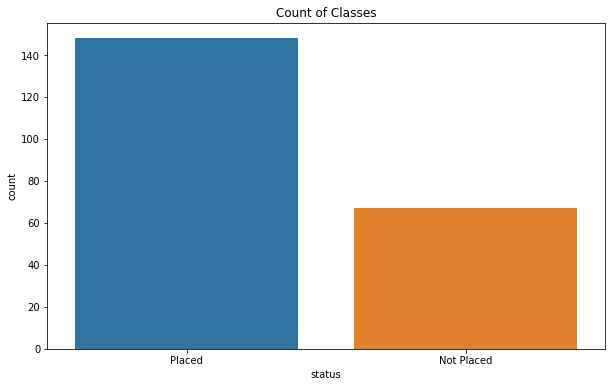

In [10]:
plt.figure(figsize=(10,6))

sns.countplot(x="status", data=job)

plt.title("Count of Classes")
plt.show()

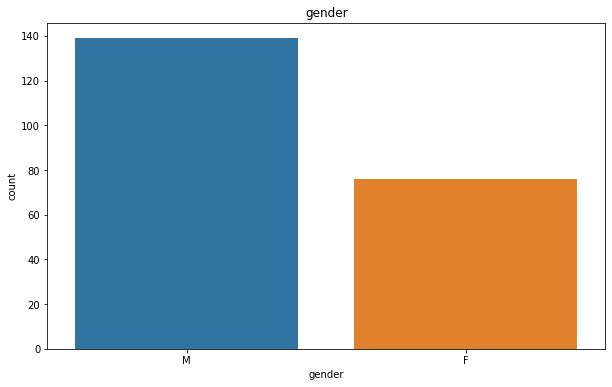

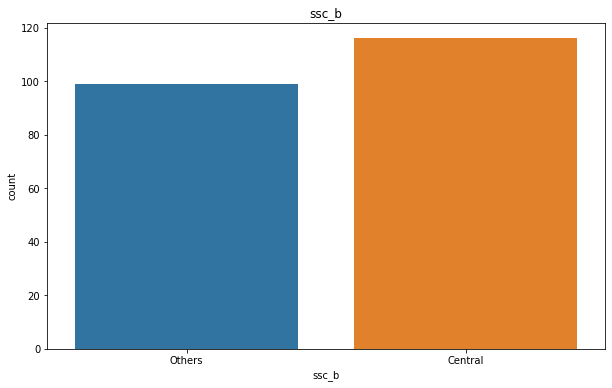

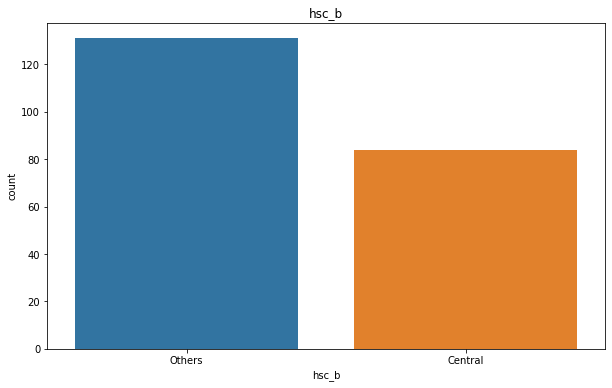

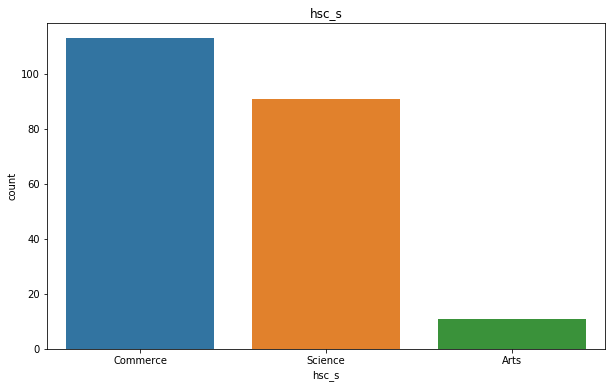

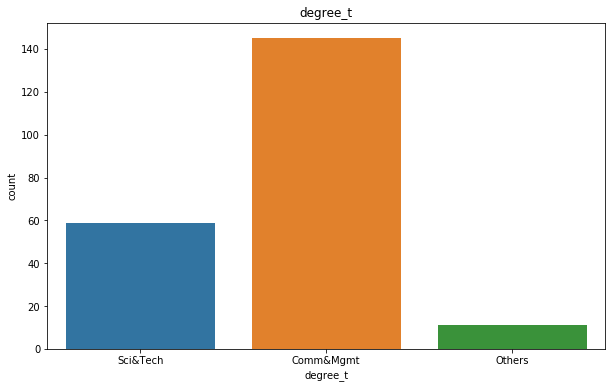

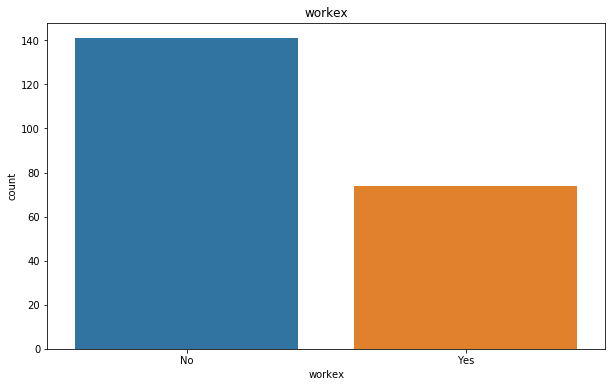

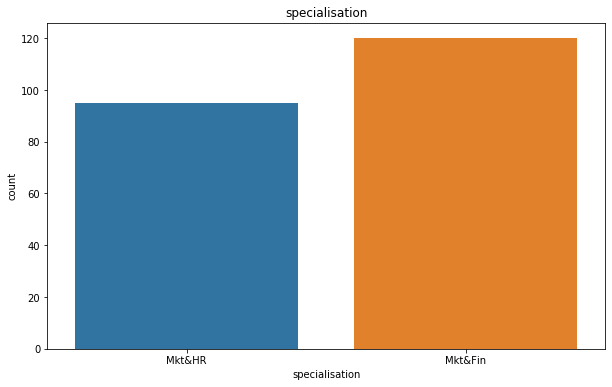

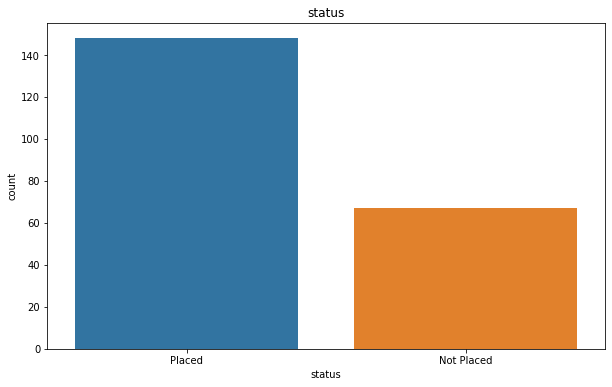

In [11]:
#### Viewing Count of categorical columns

# getting the list of categorical columns
categorical_columns = job.select_dtypes(include = ["object"]).columns

# plotting graph for each categorical column
for categorical_column in categorical_columns:
    plt.figure(figsize=(10,6))
    sns.countplot(x = categorical_column, data = job)
    plt.title(categorical_column)
    plt.show()

In [ ]:
"""
# Gender: Count of Male is Higher

# hsc_s:
-> Majority of students in HSC chose COMMERCE as their stream followed by SCIENCE
-> Very Few student chose ARTS as their stream

# degree_t:
-> For bachelor degree Majority of students chose COMMERCE 
-> Also it can be seen that students who passed out with SCIENCE stream in their HSC board changed their
stream to COMMERCE for bachelor degree because a downfall can be seen for SCIENCE when compared hsc_s
plot and degree_t plot
"""

In [12]:
#### Viewing Count of categorical columns by setting "status" as hue

job.select_dtypes(include=["object"]).columns

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

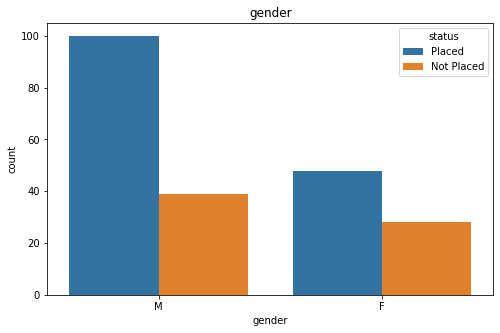

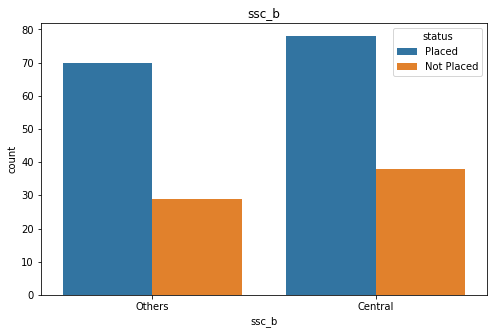

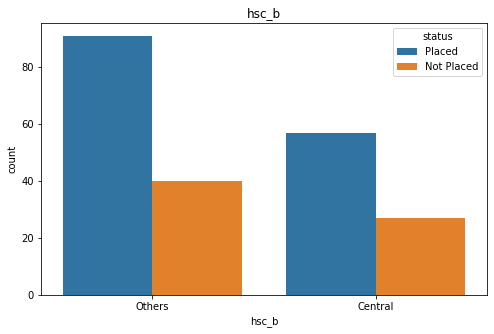

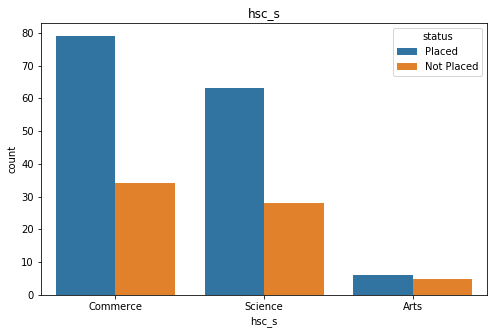

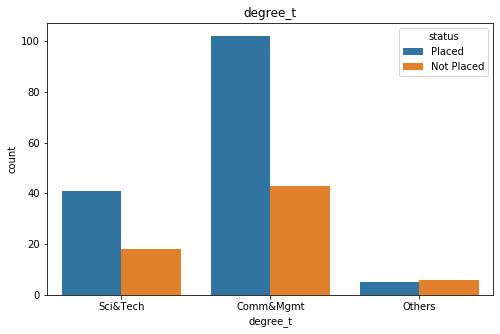

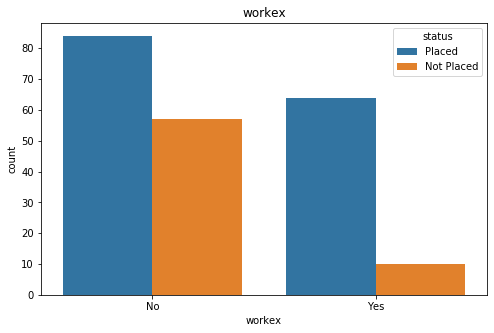

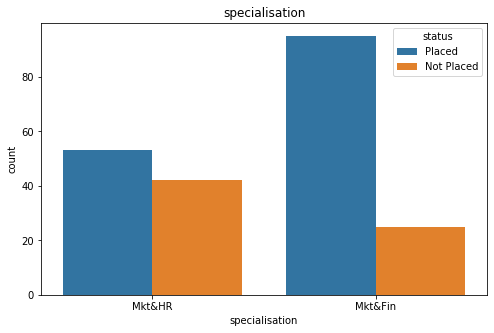

In [13]:
categorical_columns = ["gender", "ssc_b", "hsc_b", "hsc_s", "degree_t", "workex", "specialisation"]

# plotting graph for each categorical column
for categorical_column in categorical_columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x=categorical_column, data =job,  hue = "status")
    plt.title(categorical_column)
    plt.show()

Specialization: Students who did their specialization in Mkt&Fin got Placed more than ones who did in Mkt&HR

In [15]:
#### Display the top 5 Mkt&Fin students placed according to their salary ?

In [16]:
job.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [14]:
job[(job["specialisation"] == "Mkt&Fin") & (job["status"] == "Placed")].sort_values(by="salary",ascending=False).head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,120,M,60.80,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
177,178,F,73.00,Central,97.00,Others,Commerce,79.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.00,Mkt&Fin,66.46,Placed,500000.0
174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.00,Mkt&Fin,66.23,Placed,500000.0


In [15]:
#### Viewing Numerical columns

job.select_dtypes(include=["float64"]).columns

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], dtype='object')

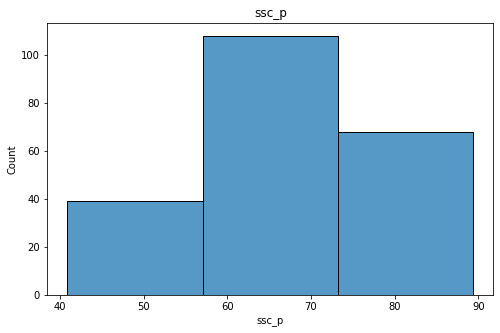

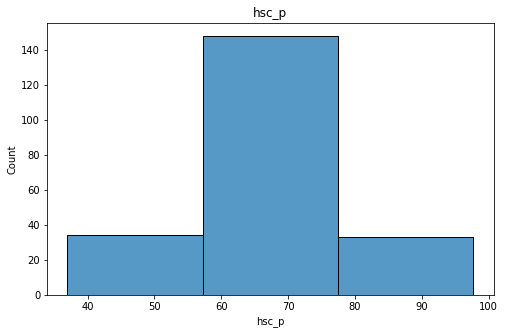

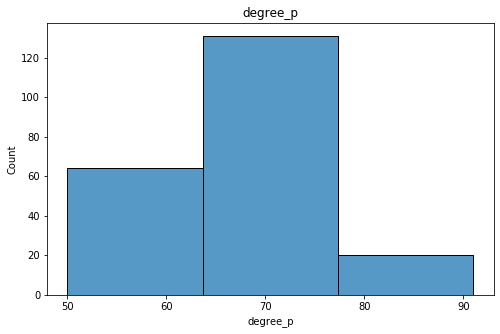

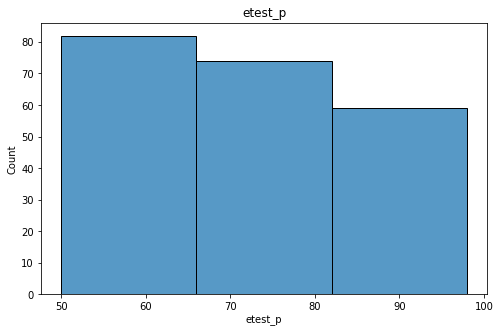

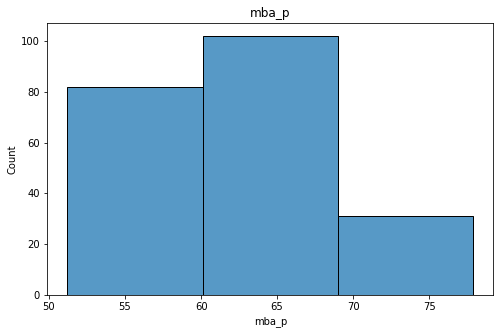

In [16]:
numerical_columns = ["ssc_p", "hsc_p", "degree_p", "etest_p" , "mba_p"]

# plotting graph for each numerical column
for numerical_column in numerical_columns:
    plt.figure(figsize=(8,5))
    sns.histplot(x=numerical_column, data =job, bins=3)
    plt.title(numerical_column)
    plt.show()

Majority of the students scored Average Marks 

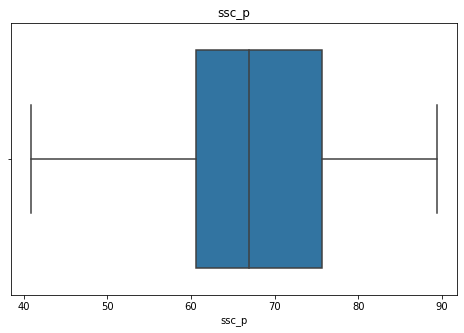

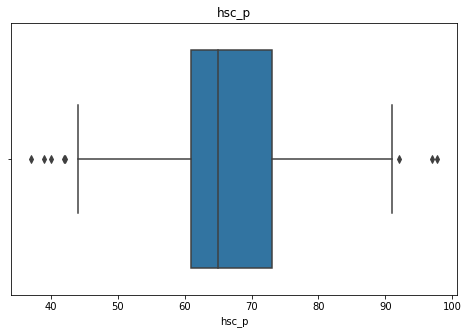

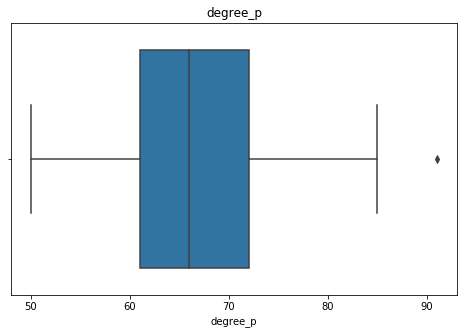

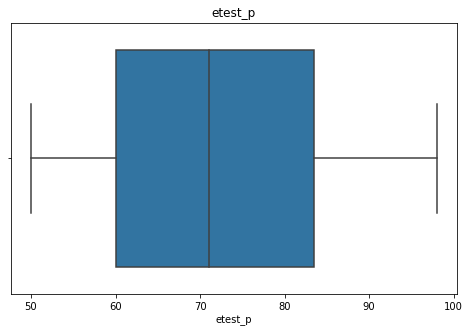

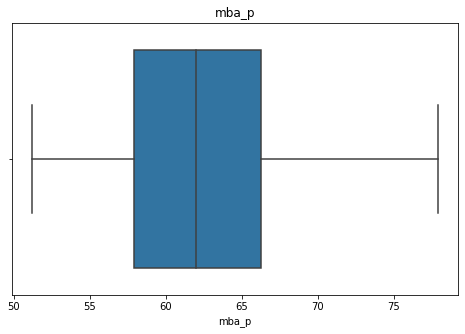

In [17]:
#### Plotting boxplot for each numerical column

for numerical_column in numerical_columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x = numerical_column, data = job)
    plt.title(numerical_column)
    plt.show()

In [ ]:
"""
-> Outliers are seen in hsc_p and degree_p
-> I decided not to treat it as at the end for campus placement your MBA % and your performance in 
interview will matter
"""

# PRE-PROCESSING

In [18]:
job.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [19]:
#### 1.) Dropping Columns
job.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
"""
-> Missing Values are present in SALARY column.
-> We've got approaches such as we can FILL salary column , DROP specific rows from salary which are 
missing or DROP salary column:

-> FILLING salary column with MEAN will be not fair for Prediction
-> DROPPING specific rows will lead to loss of no. of observation in dataset
-> I find Dropping Salary column will be a good approach  *
"""

In [21]:
job.drop(["salary"], axis=1, inplace=True)

In [22]:
job.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [23]:
# Also dropped sl_no which is unnecessary
job.drop(["sl_no"], axis=1, inplace=True)

In [24]:
job.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [25]:
#### 2.) Converting Categorical Variable to Numeric using LABEL ENCODING
job.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
dtype: object

In [26]:
# Viewing unique values present in categorical column , that needs to get converted:

for col in job.columns:
    if job[col].dtype == "object":
        print(job[col].name ,"->", job[col].unique())
        print("---------------------------------------------")    
        

gender -> ['M' 'F']
---------------------------------------------
ssc_b -> ['Others' 'Central']
---------------------------------------------
hsc_b -> ['Others' 'Central']
---------------------------------------------
hsc_s -> ['Commerce' 'Science' 'Arts']
---------------------------------------------
degree_t -> ['Sci&Tech' 'Comm&Mgmt' 'Others']
---------------------------------------------
workex -> ['No' 'Yes']
---------------------------------------------
specialisation -> ['Mkt&HR' 'Mkt&Fin']
---------------------------------------------
status -> ['Placed' 'Not Placed']
---------------------------------------------


In [27]:
colname=[]

for x in job.columns:
    if job[x].dtype == "object":
        colname.append(x)
        
colname

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [28]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    job[x] = le.fit_transform(job[x]) 
    
    
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print("Feature", "->", x)
    print("mapping", ":",  le_name_mapping)

Feature -> gender
mapping : {'F': 0, 'M': 1}
Feature -> ssc_b
mapping : {'Central': 0, 'Others': 1}
Feature -> hsc_b
mapping : {'Central': 0, 'Others': 1}
Feature -> hsc_s
mapping : {'Arts': 0, 'Commerce': 1, 'Science': 2}
Feature -> degree_t
mapping : {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2}
Feature -> workex
mapping : {'No': 0, 'Yes': 1}
Feature -> specialisation
mapping : {'Mkt&Fin': 0, 'Mkt&HR': 1}
Feature -> status
mapping : {'Not Placed': 0, 'Placed': 1}


In [29]:
job.dtypes

gender              int32
ssc_p             float64
ssc_b               int32
hsc_p             float64
hsc_b               int32
hsc_s               int32
degree_p          float64
degree_t            int32
workex              int32
etest_p           float64
specialisation      int32
mba_p             float64
status              int32
dtype: object

All variables have now converted in Numeric

In [30]:
job.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


In [31]:
# Creating X independent and Y dependent variable

X = job.values[:, 0:-1]
Y = job.values[:, -1]

In [32]:
print(X.shape)
print(Y.shape)

(215, 12)
(215,)


In [33]:
# Split the data into test and train

from sklearn.model_selection import train_test_split

#80-20 data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)   

In [34]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(172, 12)
(172,)
(43, 12)
(43,)


In [35]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X_train)

X_train=scaler.transform(X_train)

X_test=scaler.transform(X_test)

# BUILDING THE MODEL

Predicting using Logistic Regression:

In [36]:
from sklearn.linear_model import LogisticRegression

#create a model
log_reg = LogisticRegression()  

#fitting training data to the model
log_reg.fit(X_train,Y_train)

#predicting
Y_pred = log_reg.predict(X_test)

print(list(zip(Y_test, Y_pred)))

# (1,1) -> In actual student was placed , even the model is predicting that student got placed (CORRECT)
# (0,1) -> In actual student was not placed, still the model is predicting that student got placed (MISCLASSIFICATION)

[(1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0)]


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)  

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc1 = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc1)

[[ 9  3]
 [ 2 29]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.82      0.75      0.78        12
         1.0       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43

Accuracy of the model:  0.8837209302325582


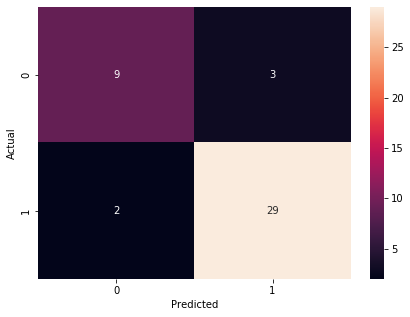

In [38]:
# Confusion matrix graph

%matplotlib inline

plt.figure(figsize=(7,5))
sns.heatmap(cfm, annot=True)

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

In [ ]:
"""
# 3,2 are MISCLASSIFICATIONS

TN -> In Actual 9 students were not placed , even model is Predicting the same  
FP -> In Actual 2 were actually placed but model predicted they were not placed   *type 2 error*

FP -> In Actual 3 were not placed but model is predicting they got placed  *type 1 error* 
TP -> In Actual 29 got placed , even model is Predicting the same  

"""

Predicting using KNN:

In [39]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors=5, metric="minkowski") 

#fitting training data to the model 
model_KNN.fit(X_train,Y_train)

#predicting
Y_pred = model_KNN.predict(X_test) 

In [40]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc2 = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc2)

[[ 6  6]
 [ 1 30]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.86      0.50      0.63        12
         1.0       0.83      0.97      0.90        31

    accuracy                           0.84        43
   macro avg       0.85      0.73      0.76        43
weighted avg       0.84      0.84      0.82        43

Accuracy of the model:  0.8372093023255814


Predicting using SVM Classifier:

In [41]:
from sklearn.svm import SVC

# create a model
svm = SVC(kernel="rbf", gamma=0.1, C=1)

#fitting training data to the model 
svm.fit(X_train,Y_train)

#predicting
Y_pred = svm.predict(X_test) 

In [42]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc3 = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc3)

[[ 6  6]
 [ 1 30]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.86      0.50      0.63        12
         1.0       0.83      0.97      0.90        31

    accuracy                           0.84        43
   macro avg       0.85      0.73      0.76        43
weighted avg       0.84      0.84      0.82        43

Accuracy of the model:  0.8372093023255814


In [ ]:
########## TUNING THROUGH GRID SEARCH

In [43]:
svm = SVC()

In [44]:
# Define the parameter for grid search

from sklearn.model_selection import GridSearchCV

parameter = {
    "kernel" : ["rbf", "sigmoid","linear"],
    "gamma" :[0.1, 0.01],
    "C" : [0.1, 0.01,10],
    "random_state" : [10]
}

In [45]:
# Perform grid search to find the best combination of hyperparameter

grid_search = GridSearchCV(svm, param_grid=parameter, scoring="accuracy", cv=5)

In [46]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 10], 'gamma': [0.1, 0.01],
                         'kernel': ['rbf', 'sigmoid', 'linear'],
                         'random_state': [10]},
             scoring='accuracy')

In [47]:
# To see which parameter got selected
print(grid_search.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf', 'random_state': 10}


In [48]:
# Step 7: Retrain the model with the best hyperparameters

best_svm = SVC(C= 10, gamma=0.01, kernel="rbf", random_state=10)
best_svm.fit(X_train, Y_train)

#predicting
Y_pred = best_svm.predict(X_test)

In [50]:
cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)  

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc3G = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc3G)

[[ 8  4]
 [ 2 29]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.80      0.67      0.73        12
         1.0       0.88      0.94      0.91        31

    accuracy                           0.86        43
   macro avg       0.84      0.80      0.82        43
weighted avg       0.86      0.86      0.86        43

Accuracy of the model:  0.8604651162790697


In [ ]:
########## On using GridSearch Accuracy increased from 83% to 86%

Predicting using Decision Tree Classifier:

In [51]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier()

#fit the model on the data 
model_DecisionTree.fit(X_train,Y_train)

#predicting
Y_pred = model_DecisionTree.predict(X_test)

In [52]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc4 = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc4)

[[ 9  3]
 [ 4 27]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.69      0.75      0.72        12
         1.0       0.90      0.87      0.89        31

    accuracy                           0.84        43
   macro avg       0.80      0.81      0.80        43
weighted avg       0.84      0.84      0.84        43

Accuracy of the model:  0.8372093023255814


Predicting using Random Forest Classifier:

In [55]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=50 , random_state=10)

#fit the model on the data 
model_RandomForest.fit(X_train,Y_train)

#predicting
Y_pred = model_RandomForest.predict(X_test)

In [56]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc5 = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc5)

[[ 6  6]
 [ 2 29]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.75      0.50      0.60        12
         1.0       0.83      0.94      0.88        31

    accuracy                           0.81        43
   macro avg       0.79      0.72      0.74        43
weighted avg       0.81      0.81      0.80        43

Accuracy of the model:  0.813953488372093


Predicting using Gradient Boosting Classifier:

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

#fit the model on the data 
gb.fit(X_train,Y_train)

#predicting
Y_pred = gb.predict(X_test)

In [58]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc6 = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc6)

[[ 6  6]
 [ 2 29]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.75      0.50      0.60        12
         1.0       0.83      0.94      0.88        31

    accuracy                           0.81        43
   macro avg       0.79      0.72      0.74        43
weighted avg       0.81      0.81      0.80        43

Accuracy of the model:  0.813953488372093


Predicting using the Naive Bayes Classifier

In [59]:
from sklearn.naive_bayes import GaussianNB

model_NB=GaussianNB()

#fit the model on the data and predict the values
model_NB.fit(X_train,Y_train)
Y_pred=model_NB.predict(X_test)

In [61]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm) 

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc7 =accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc7)

[[ 7  5]
 [ 3 28]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.70      0.58      0.64        12
         1.0       0.85      0.90      0.88        31

    accuracy                           0.81        43
   macro avg       0.77      0.74      0.76        43
weighted avg       0.81      0.81      0.81        43

Accuracy of the model:  0.813953488372093


# SELECTING THE MODEL

In [62]:
print(acc1, acc2, acc3G, acc4, acc5, acc6, acc7)

0.8837209302325582 0.8372093023255814 0.8604651162790697 0.8372093023255814 0.813953488372093 0.813953488372093 0.813953488372093


In [63]:
scores = pd.DataFrame({"MODEL": ["LogisticRegression","KNN","SVM","DecisionTree","RandomForest",
                                 "GradientBoosting", "NaiveBayes"],
                      "ACCURACY":[acc1 *100,
                                  acc2 *100,
                                  acc3G *100,           # tuned SVM
                                  acc4 *100,
                                  acc5 *100,
                                  acc6 *100,
                                  acc7 *100]})

In [64]:
scores

,MODEL,ACCURACY
0,LogisticRegression,88.372093
1,KNN,83.720930
2,SVM,86.046512
3,DecisionTree,83.720930
4,RandomForest,81.395349
5,GradientBoosting,81.395349
6,NaiveBayes,81.395349


LOGISTIC REGRESSION IS THE BEST MODEL AMONG ALL WITH THE HIGHEST ACCURACY SCORE

# TRAINING THE DATASET WITH LOGISTIC REGRESSION 

In [65]:
#fitting training data to the model
log_reg.fit(X_train,Y_train)

LogisticRegression()

# Saving Model using Pickle

In [66]:
import pickle

In [67]:
# To Save file
filename = "logmodel.pkl"

with open(filename, "wb") as f:
    pickle.dump(log_reg, f)

In [68]:
# Load the model
filename = "logmodel.pkl"

with open(filename, "rb") as f:
    loaded_model = pickle.load(f)   

# Predicting on Unseen data using Pickle

In [ ]:
"""
import pickle,
Load your pickle file,
Make prediction using object you created for pickle i.e (loaded_model)
"""

In [69]:
# Create the data for a single observation

my_data = pd.DataFrame({
    "gender": [0],
    "ssc_p": [90.0],
    "ssc_b": [1],
    "hsc_p": [84.0],
    "hsc_b": [1],
    "hsc_s": [1],
    "degree_p": [85.0],
    "degree_t": [0],
    "workex": [0],
    "etest_p": [75.0],
    "specialisation": [0],
    "mba_p": [81.8]
})


In [70]:
# Make prediction for the single observation

predictions = loaded_model.predict(my_data)

In [71]:
# Print the predicted class label
print("Predicted Class Label:", predictions[0])             # 0th is the index(row)

Predicted Class Label: 1.0
